In [207]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [171]:
loan_df = pd.read_csv("loan.csv",low_memory=False)
len(loan_df)


39717

In [133]:
loan_df.head()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit
0,1077501,1296599,5000,5000,4975.0,36 months,10.65%,162.87,B,B2,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
1,1077430,1314167,2500,2500,2500.0,60 months,15.27%,59.83,C,C4,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
2,1077175,1313524,2400,2400,2400.0,36 months,15.96%,84.33,C,C5,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
3,1076863,1277178,10000,10000,10000.0,36 months,13.49%,339.31,C,C1,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
4,1075358,1311748,3000,3000,3000.0,60 months,12.69%,67.79,B,B5,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN


In [172]:
# remove columns with 70% null values 
threshold= 0.7 * len(loan_df)
loan_df_1 = loan_df.dropna(thresh=threshold, axis=1)
loan_df_1.isna().sum()


id                               0
member_id                        0
loan_amnt                        0
funded_amnt                      0
funded_amnt_inv                  0
term                             0
int_rate                         0
installment                      0
grade                            0
sub_grade                        0
emp_title                     2459
emp_length                    1075
home_ownership                   0
annual_inc                       0
verification_status              0
issue_d                          0
loan_status                      0
pymnt_plan                       0
url                              0
purpose                          0
title                           11
zip_code                         0
addr_state                       0
dti                              0
delinq_2yrs                      0
earliest_cr_line                 0
inq_last_6mths                   0
open_acc                         0
pub_rec             

In [173]:
#remove behaviorial columns as mentioned in the presentation guide 
list_behaviorial_columns= ['delinq_2yrs','earliest_cr_line','inq_last_6mths','open_acc','pub_rec','revol_bal','revol_util','total_acc',
'out_prncp','out_prncp_inv','total_pymnt','total_pymnt_inv','total_rec_prncp','total_rec_int','total_rec_late_fee','recoveries',
'collection_recovery_fee','last_pymnt_d','last_pymnt_amnt','last_credit_pull_d','application_type']

loan_df_2 = loan_df_1.drop(list_behaviorial_columns, axis=1)
loan_df_2.shape


(39717, 32)

In [174]:
loan_df_2.isna().sum()
# check the emp_title column and replace null values with NA
loan_df_2["emp_title"].fillna("NA", inplace = True)
loan_df_2.emp_title.unique()

array(['NA', 'Ryder', 'AIR RESOURCES BOARD', ..., 'FiSite Research',
       'Squarewave Solutions, Ltd.', 'Evergreen Center'], dtype=object)

In [175]:
loan_df_2.isna().sum()
loan_df_2.emp_length.unique()
#1075 records remove that as the percentage is not that big for the day will look at this in the end
# for now not removing it 
loan_df_2.head()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,addr_state,dti,initial_list_status,collections_12_mths_ex_med,policy_code,acc_now_delinq,chargeoff_within_12_mths,delinq_amnt,pub_rec_bankruptcies,tax_liens
0,1077501,1296599,5000,5000,4975.0,36 months,10.65%,162.87,B,B2,...,AZ,27.65,f,0.0,1,0,0.0,0,0.0,0.0
1,1077430,1314167,2500,2500,2500.0,60 months,15.27%,59.83,C,C4,...,GA,1.00,f,0.0,1,0,0.0,0,0.0,0.0
2,1077175,1313524,2400,2400,2400.0,36 months,15.96%,84.33,C,C5,...,IL,8.72,f,0.0,1,0,0.0,0,0.0,0.0
3,1076863,1277178,10000,10000,10000.0,36 months,13.49%,339.31,C,C1,...,CA,20.00,f,0.0,1,0,0.0,0,0.0,0.0
4,1075358,1311748,3000,3000,3000.0,60 months,12.69%,67.79,B,B5,...,OR,17.94,f,0.0,1,0,0.0,0,0.0,0.0


In [176]:
loan_df_2.nunique().sort_values().head(20)


tax_liens                       1
initial_list_status             1
collections_12_mths_ex_med      1
policy_code                     1
pymnt_plan                      1
chargeoff_within_12_mths        1
delinq_amnt                     1
acc_now_delinq                  1
term                            2
loan_status                     3
verification_status             3
pub_rec_bankruptcies            3
home_ownership                  5
grade                           7
emp_length                     11
purpose                        14
sub_grade                      35
addr_state                     50
issue_d                        55
int_rate                      371
dtype: int64

In [177]:

#remove columns with just 1 value
single_value_col = list(['tax_liens','initial_list_status','collections_12_mths_ex_med','policy_code','pymnt_plan','chargeoff_within_12_mths','delinq_amnt','acc_now_delinq'])
loan_df_3 = loan_df_2.drop(single_value_col,axis=1)
loan_df_3.shape
loan_df_3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39717 entries, 0 to 39716
Data columns (total 24 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id                    39717 non-null  int64  
 1   member_id             39717 non-null  int64  
 2   loan_amnt             39717 non-null  int64  
 3   funded_amnt           39717 non-null  int64  
 4   funded_amnt_inv       39717 non-null  float64
 5   term                  39717 non-null  object 
 6   int_rate              39717 non-null  object 
 7   installment           39717 non-null  float64
 8   grade                 39717 non-null  object 
 9   sub_grade             39717 non-null  object 
 10  emp_title             39717 non-null  object 
 11  emp_length            38642 non-null  object 
 12  home_ownership        39717 non-null  object 
 13  annual_inc            39717 non-null  float64
 14  verification_status   39717 non-null  object 
 15  issue_d            

In [178]:
# list columns 
print(loan_df_3.columns)

Index(['id', 'member_id', 'loan_amnt', 'funded_amnt', 'funded_amnt_inv',
       'term', 'int_rate', 'installment', 'grade', 'sub_grade', 'emp_title',
       'emp_length', 'home_ownership', 'annual_inc', 'verification_status',
       'issue_d', 'loan_status', 'url', 'purpose', 'title', 'zip_code',
       'addr_state', 'dti', 'pub_rec_bankruptcies'],
      dtype='object')


In [179]:
# no use of zip code 
loan_df_4 = loan_df_3.drop(['zip_code'],axis=1)
loan_df_4.shape

(39717, 23)

In [180]:
loan_df_4.groupby('emp_title').count()
# no use in analysis 
loan_df_5 = loan_df_4.drop(['emp_title'],axis=1)
loan_df_5.shape

(39717, 22)

In [181]:
loan_df_5.home_ownership.unique()
loan_df_5.groupby('home_ownership').count()
# only 3 rows with None so we can remove
loan_df_6=loan_df_5[loan_df_5.home_ownership!="NONE"]
loan_df_6.shape
loan_df_6.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 39714 entries, 0 to 39716
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id                    39714 non-null  int64  
 1   member_id             39714 non-null  int64  
 2   loan_amnt             39714 non-null  int64  
 3   funded_amnt           39714 non-null  int64  
 4   funded_amnt_inv       39714 non-null  float64
 5   term                  39714 non-null  object 
 6   int_rate              39714 non-null  object 
 7   installment           39714 non-null  float64
 8   grade                 39714 non-null  object 
 9   sub_grade             39714 non-null  object 
 10  emp_length            38639 non-null  object 
 11  home_ownership        39714 non-null  object 
 12  annual_inc            39714 non-null  float64
 13  verification_status   39714 non-null  object 
 14  issue_d               39714 non-null  object 
 15  loan_status        

In [144]:
len(loan_df_6.annual_inc.unique())


5318

In [182]:
loan_df_6.loan_status.unique()
#remove Current = loan_status as it would not be included in our analysis
loan_df_7=loan_df_6[loan_df_6.loan_status!="Current"]
loan_df_7.shape
loan_df_7.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 38574 entries, 0 to 39716
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id                    38574 non-null  int64  
 1   member_id             38574 non-null  int64  
 2   loan_amnt             38574 non-null  int64  
 3   funded_amnt           38574 non-null  int64  
 4   funded_amnt_inv       38574 non-null  float64
 5   term                  38574 non-null  object 
 6   int_rate              38574 non-null  object 
 7   installment           38574 non-null  float64
 8   grade                 38574 non-null  object 
 9   sub_grade             38574 non-null  object 
 10  emp_length            37541 non-null  object 
 11  home_ownership        38574 non-null  object 
 12  annual_inc            38574 non-null  float64
 13  verification_status   38574 non-null  object 
 14  issue_d               38574 non-null  object 
 15  loan_status        

In [183]:
loan_df_7[['id','member_id','url']].head()
# we can remove these columns as they are unique and provide value only as unique keys
loan_df_8 = loan_df_7.drop(['id','member_id','url'],axis=1)
loan_df_8.shape


(38574, 19)

In [184]:
loan_df_8.head()
# Remove % from int_rate
loan_df_8['int_rate_2']=loan_df_8.int_rate.str.strip("%").astype(float)


In [186]:

# Make Term field numeric
loan_df_8['term_2'] = loan_df_8.term.apply(lambda x: int(x[1:3])).astype(int)
loan_df_8.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 38574 entries, 0 to 39716
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   loan_amnt             38574 non-null  int64  
 1   funded_amnt           38574 non-null  int64  
 2   funded_amnt_inv       38574 non-null  float64
 3   term                  38574 non-null  object 
 4   int_rate              38574 non-null  object 
 5   installment           38574 non-null  float64
 6   grade                 38574 non-null  object 
 7   sub_grade             38574 non-null  object 
 8   emp_length            37541 non-null  object 
 9   home_ownership        38574 non-null  object 
 10  annual_inc            38574 non-null  float64
 11  verification_status   38574 non-null  object 
 12  issue_d               38574 non-null  object 
 13  loan_status           38574 non-null  object 
 14  purpose               38574 non-null  object 
 15  title              

In [195]:
loan_df_8["emp_length"].fillna("NA", inplace = True)
loan_df_8['emp_length'].unique()


array(['10+ years', '< 1 year', '3 years', '8 years', '9 years',
       '4 years', '5 years', '1 year', '6 years', '2 years', '7 years',
       'NA'], dtype=object)

In [199]:
loan_df_8.loc[loan_df_8["emp_length"] == "10+ years", "emp_length"] = 10
loan_df_8.loc[loan_df_8["emp_length"] == "3 years", "emp_length"] = 3
loan_df_8.loc[loan_df_8["emp_length"] == "8 years", "emp_length"] = 8
loan_df_8.loc[loan_df_8["emp_length"] == "9 years", "emp_length"] = 9
loan_df_8.loc[loan_df_8["emp_length"] == "4 years", "emp_length"] = 4
loan_df_8.loc[loan_df_8["emp_length"] == "5 years", "emp_length"] = 5
loan_df_8.loc[loan_df_8["emp_length"] == "6 years", "emp_length"] = 6
loan_df_8.loc[loan_df_8["emp_length"] == "2 years", "emp_length"] = 2
loan_df_8.loc[loan_df_8["emp_length"] == "7 years", "emp_length"] = 7
loan_df_8.loc[loan_df_8["emp_length"] == "< 1 year", "emp_length"] = 0
loan_df_8.loc[loan_df_8["emp_length"] == "1 year", "emp_length"] = 1
loan_df_8.loc[loan_df_8["emp_length"] == "NA", "emp_length"] = -1
loan_df_8['emp_length'].unique()



array([10, 0, 3, 8, 9, 4, 5, 1, 6, 2, 7, -1], dtype=object)

In [212]:
loan_df_8['emp_length'] = loan_df_8[['emp_length']].apply(pd.to_numeric)
#loan_df_8['emp_length'].hist(bins=[-1,0,1,2,3,4,5,6,7,8,9,10])
loan_df_8['emp_length'].value_counts()


 10    8488
 0     4506
 2     4291
 3     4012
 4     3342
 5     3193
 1     3169
 6     2168
 7     1711
 8     1435
 9     1226
-1     1033
Name: emp_length, dtype: int64

In [217]:
#check funded_amt
loan_df_9 = loan_df_8.loc[(loan_df_8['funded_amnt_inv'] > loan_df_8['loan_amnt'])]
len(loan_df_9)


0

In [219]:
loan_df_8.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 38574 entries, 0 to 39716
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   loan_amnt             38574 non-null  int64  
 1   funded_amnt           38574 non-null  int64  
 2   funded_amnt_inv       38574 non-null  float64
 3   term                  38574 non-null  object 
 4   int_rate              38574 non-null  object 
 5   installment           38574 non-null  float64
 6   grade                 38574 non-null  object 
 7   sub_grade             38574 non-null  object 
 8   emp_length            38574 non-null  int64  
 9   home_ownership        38574 non-null  object 
 10  annual_inc            38574 non-null  float64
 11  verification_status   38574 non-null  object 
 12  issue_d               38574 non-null  object 
 13  loan_status           38574 non-null  object 
 14  purpose               38574 non-null  object 
 15  title              

In [222]:
#change issue_d to datetime
loan_df_8.issue_d=pd.to_datetime(loan_df_8.issue_d, format='%b-%y')
loan_df_8['issue_year']=pd.DatetimeIndex(loan_df_8['issue_d']).year
loan_df_8['issue_mon']=pd.DatetimeIndex(loan_df_8['issue_d']).month
loan_df_8.head()


,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_length,home_ownership,...,loan_status,purpose,title,addr_state,dti,pub_rec_bankruptcies,int_rate_2,term_2,issue_year,issue_mon
0,5000,5000,4975.0,36 months,10.65%,162.87,B,B2,10,RENT,...,Fully Paid,credit_card,Computer,AZ,27.65,0.0,10.65,36,2011,12
1,2500,2500,2500.0,60 months,15.27%,59.83,C,C4,0,RENT,...,Charged Off,car,bike,GA,1.00,0.0,15.27,60,2011,12
2,2400,2400,2400.0,36 months,15.96%,84.33,C,C5,10,RENT,...,Fully Paid,small_business,real estate business,IL,8.72,0.0,15.96,36,2011,12
3,10000,10000,10000.0,36 months,13.49%,339.31,C,C1,10,RENT,...,Fully Paid,other,personel,CA,20.00,0.0,13.49,36,2011,12
5,5000,5000,5000.0,36 months,7.90%,156.46,A,A4,3,RENT,...,Fully Paid,wedding,My wedding loan I promise to pay back,AZ,11.20,0.0,7.90,36,2011,12


<AxesSubplot:title={'center':'annual_inc'}, xlabel='loan_status'>

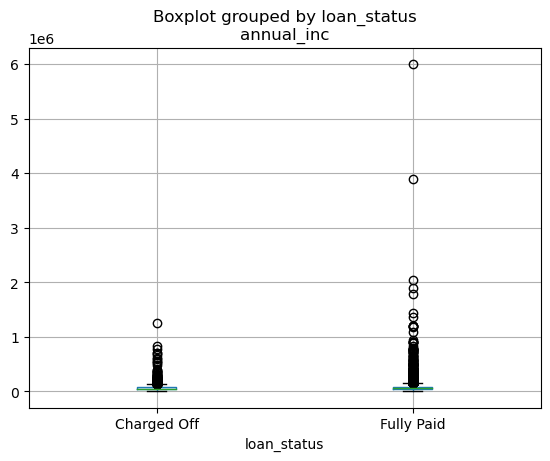

In [224]:
loan_df_8.boxplot(by ='loan_status', column =['annual_inc'], grid = True)

In [225]:
#Remove outliers
loan_df_8.shape


(38574, 23)